In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# importing csv into google colab -
from google.colab import files
uploaded = files.upload()

Saving training_data.csv to training_data.csv


In [2]:
df = pd.read_csv('training_data.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# dropping serial number column -
df = df.iloc[:,1:]
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### EDA

In [4]:
# shape of dataframe -
df.shape

(150000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Data cleaning

In [7]:
df.duplicated().sum()

609

In [8]:
# checking the duplicates -
dup = df[df.duplicated()]
dup

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1669,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
7823,0,1.0,29,0,0.0,NaN,0,0,0,0,0.0
7920,0,1.0,22,0,0.0,820.0,1,0,0,0,0.0
8840,0,1.0,23,0,0.0,820.0,1,0,0,0,0.0
10869,0,1.0,73,0,0.0,NaN,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149139,0,0.0,77,0,0.0,NaN,2,0,0,0,0.0
149431,0,1.0,25,0,0.0,NaN,1,0,0,0,NaN
149472,0,1.0,84,0,0.0,NaN,1,0,0,0,0.0
149769,0,1.0,23,98,0.0,NaN,0,98,0,98,NaN


In [9]:
# dropping duplicate records -
df = df.drop_duplicates()

In [ ]:
# data distribution -
for i in (df.columns[:]):
    print(df[i].value_counts())
    print('****'*10)
    print("\n")

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64
****************************************


0.000000    10569
1.000000     9956
1.000000       17
0.950100        8
0.007984        6
            ...  
0.954162        1
0.820080        1
0.176771        1
0.084661        1
0.850283        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64
****************************************


49     3834
48     3799
50     3747
47     3719
46     3710
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64
****************************************


0     125453
1      16033
2       4598
3       1754
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64
****************************************


0.000000    3515
1.000000     227
4.000000     174
2.000000    

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('*'*15)

SeriousDlqin2yrs
[1 0]
***************
RevolvingUtilizationOfUnsecuredLines
[0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295]
***************
age
[ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]
***************
NumberOfTime30-59DaysPastDueNotWorse
[ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
***************
DebtRatio
[0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808]
***************
MonthlyIncome
[ 9120.  2600.  3042. ... 15648.   521.  7647.]
***************
NumberOfOpenCreditLinesAndLoans
[13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 33 30 34 37 38 36 35 54 43 45 49 57 48 40 58
 51 52 39

In [ ]:
# by analysing the given data we got monthly income and age for some entries to be 0 which should not be 0.


In [ ]:
df['MonthlyIncome'].value_counts()

5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1616
           ... 
16084.0       1
10523.0       1
55250.0       1
9242.0        1
7647.0        1
Name: MonthlyIncome, Length: 13594, dtype: int64

In [ ]:
df['age'].value_counts()

49     3834
48     3799
50     3747
47     3719
46     3710
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

In [10]:
# examining the entries with 0 -
df.loc[(df['MonthlyIncome']==0.0) & (df['SeriousDlqin2yrs'] == 1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
4534,1,0.798359,45,0,185.0,0.0,5,0,0,1,3.0
7221,1,1.000000,29,0,494.0,0.0,2,0,0,0,0.0
8289,1,1.000000,37,1,2486.0,0.0,7,1,1,1,4.0
8505,1,0.641294,47,1,684.0,0.0,5,5,0,5,0.0
9879,1,1.000000,63,2,1031.0,0.0,7,2,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
144135,1,0.555997,52,1,1895.0,0.0,16,0,2,0,2.0
144678,1,1.000000,62,1,2150.0,0.0,4,0,2,0,0.0
146201,1,0.184198,35,1,977.0,0.0,4,0,1,0,2.0
148759,1,0.000000,56,0,2662.0,0.0,14,0,2,0,1.0


In [11]:
df.loc[(df['MonthlyIncome']==0.0) & (df['SeriousDlqin2yrs'] == 0)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
14,0,0.019657,76,0,477.0,0.0,6,0,1,0,0.0
50,0,0.818978,73,0,3095.0,0.0,9,0,1,1,0.0
73,0,0.059669,31,0,3162.0,0.0,11,0,2,0,1.0
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
298,0,0.085152,25,0,1005.0,0.0,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149383,0,0.239302,63,0,3153.0,0.0,29,0,1,0,0.0
149562,0,0.230799,72,0,430.0,0.0,7,0,0,0,0.0
149646,0,0.080084,69,0,1248.0,0.0,8,0,1,0,1.0
149673,0,0.132362,82,0,4123.0,0.0,14,0,2,0,0.0


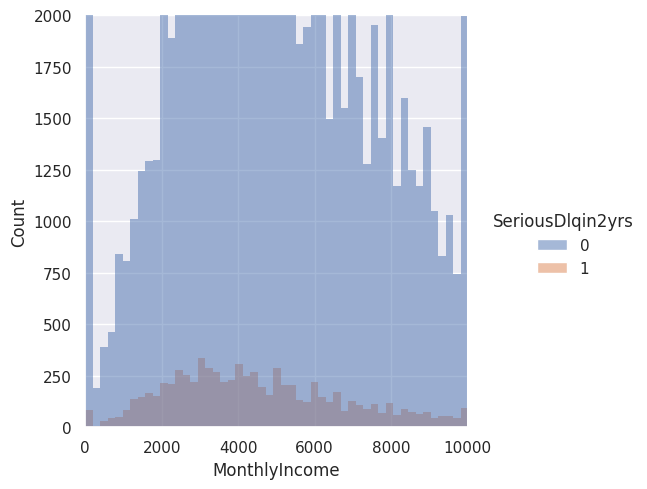

In [ ]:
sns.displot( x = df['MonthlyIncome'],hue=df['SeriousDlqin2yrs'])
plt.ylim(0,2000)
plt.xlim(0,10000)
plt.show()

In [12]:
df['MonthlyIncome'].median()

5400.0

In [13]:
# we use the loc function to find all the rows where the "monthly income" column has a
# value of zero and then replace those rows with median
# df['MonthlyIncome'].quantile(0.25)
df.loc[df['MonthlyIncome']==0,'MonthlyIncome'] = df['MonthlyIncome'].median()

In [14]:
df.loc[df['MonthlyIncome']==0.0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [15]:
# similarly with age col -
df.loc[df['age'] == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [16]:
df.loc[df['age'] == 0,'age'] = df['age'].median()

In [17]:
#percentage of null values in col-
df.isnull().sum()/len(df)*100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.560081
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.562403
dtype: float64

In [18]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())

In [19]:
df.isnull().sum()/len(df)*100

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [26]:
# converting NumberOfDependents float type to int
df['NumberOfDependents'] = df['NumberOfDependents'].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  int64  
dtype

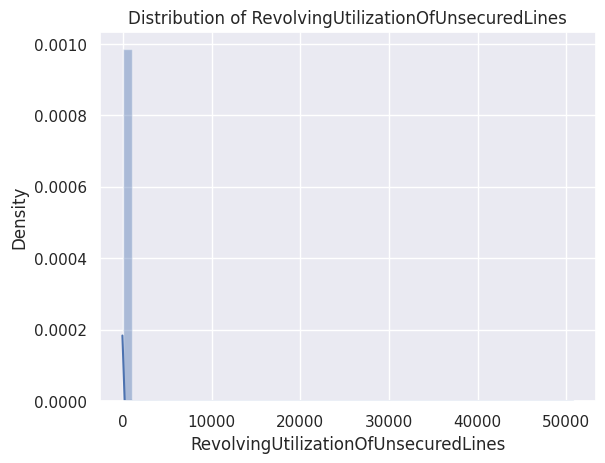

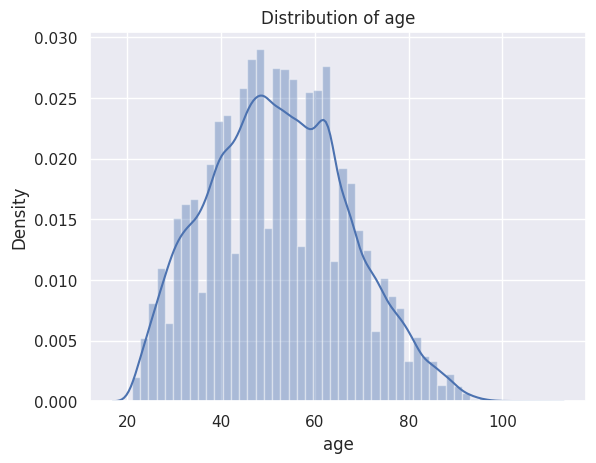

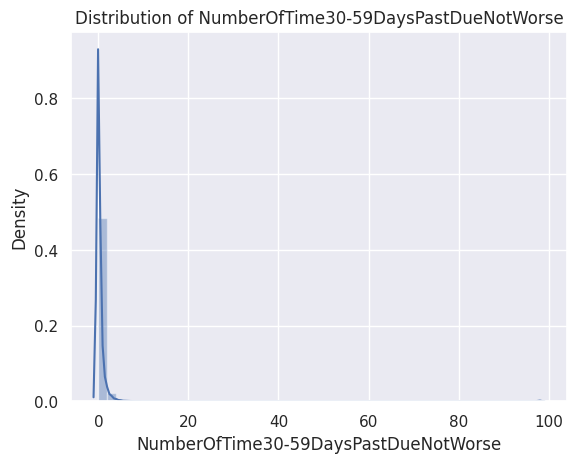

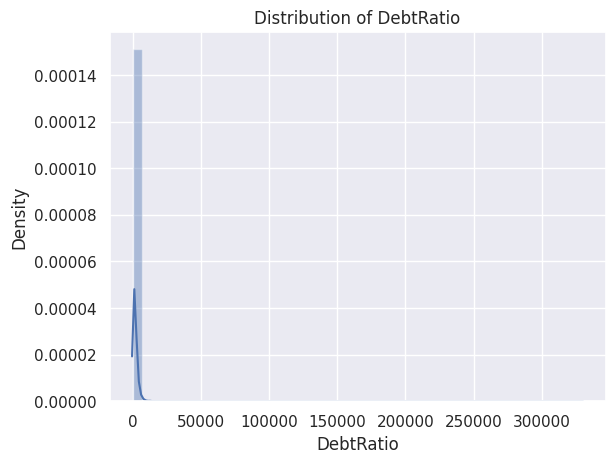

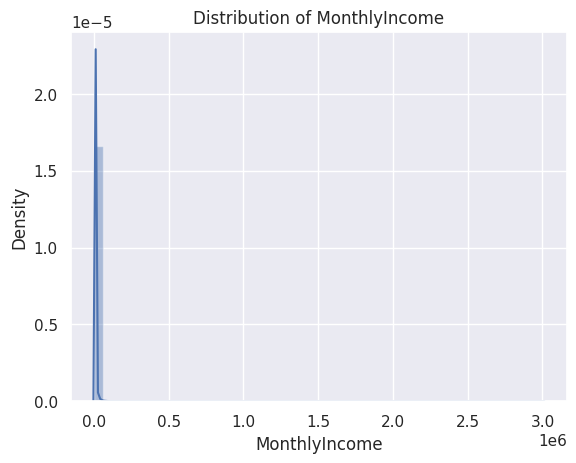

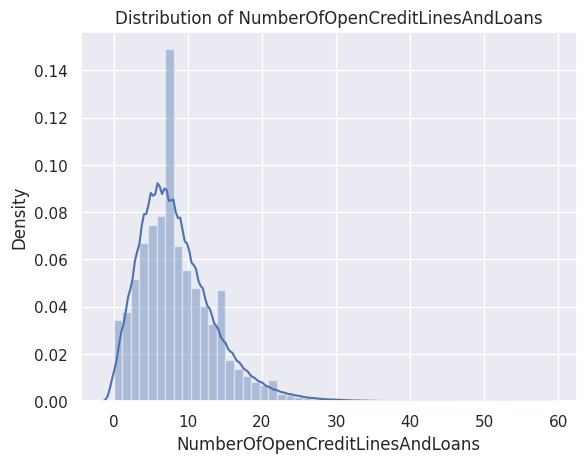

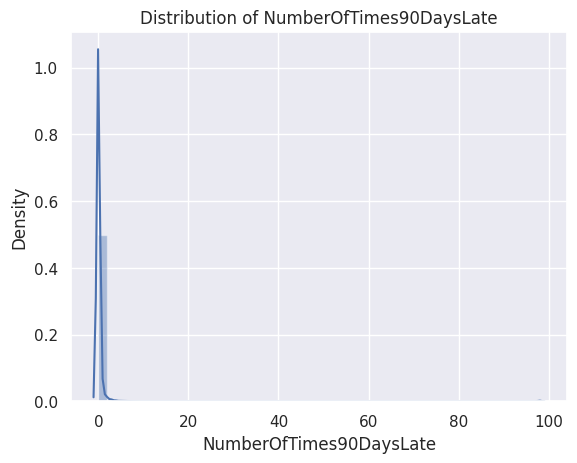

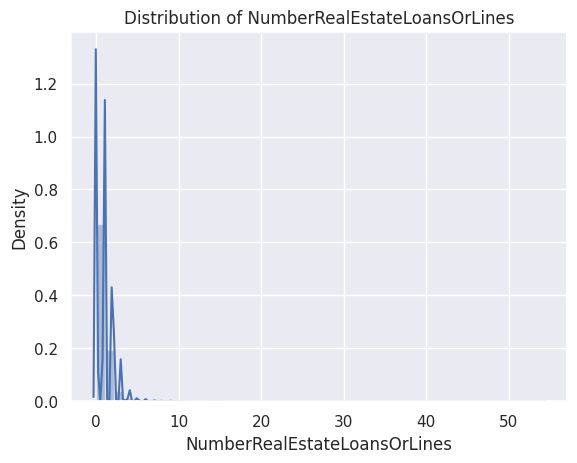

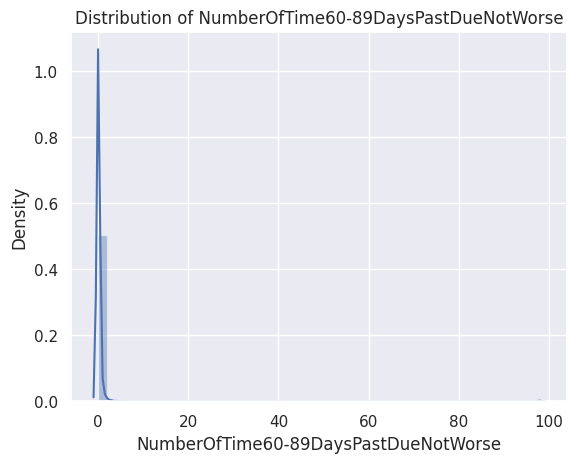

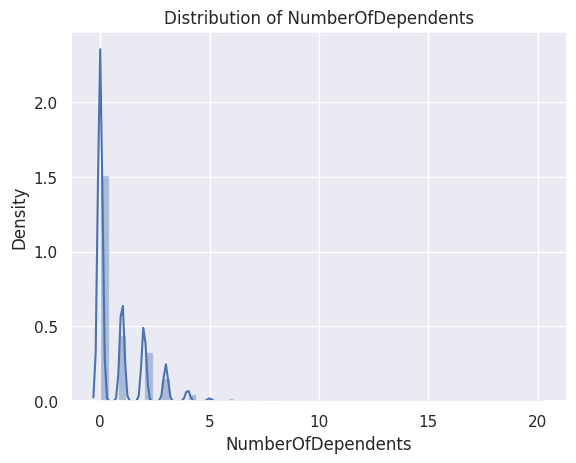

In [ ]:
# distribution -
for i in df.columns[1:]:
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

In [ ]:
##sampling 30% of the DataFrame as it was taking long time to visualize whole data with pairplot (sampling with replacement)-
# sampled_data = df.sample(n=1000, random_state=42)
# sampled_data_frac = df.sample(frac=0.2, replace=True, random_state=42)

In [ ]:
sampled_data_frac = df.sample(frac=0.3, replace=False, random_state=42)

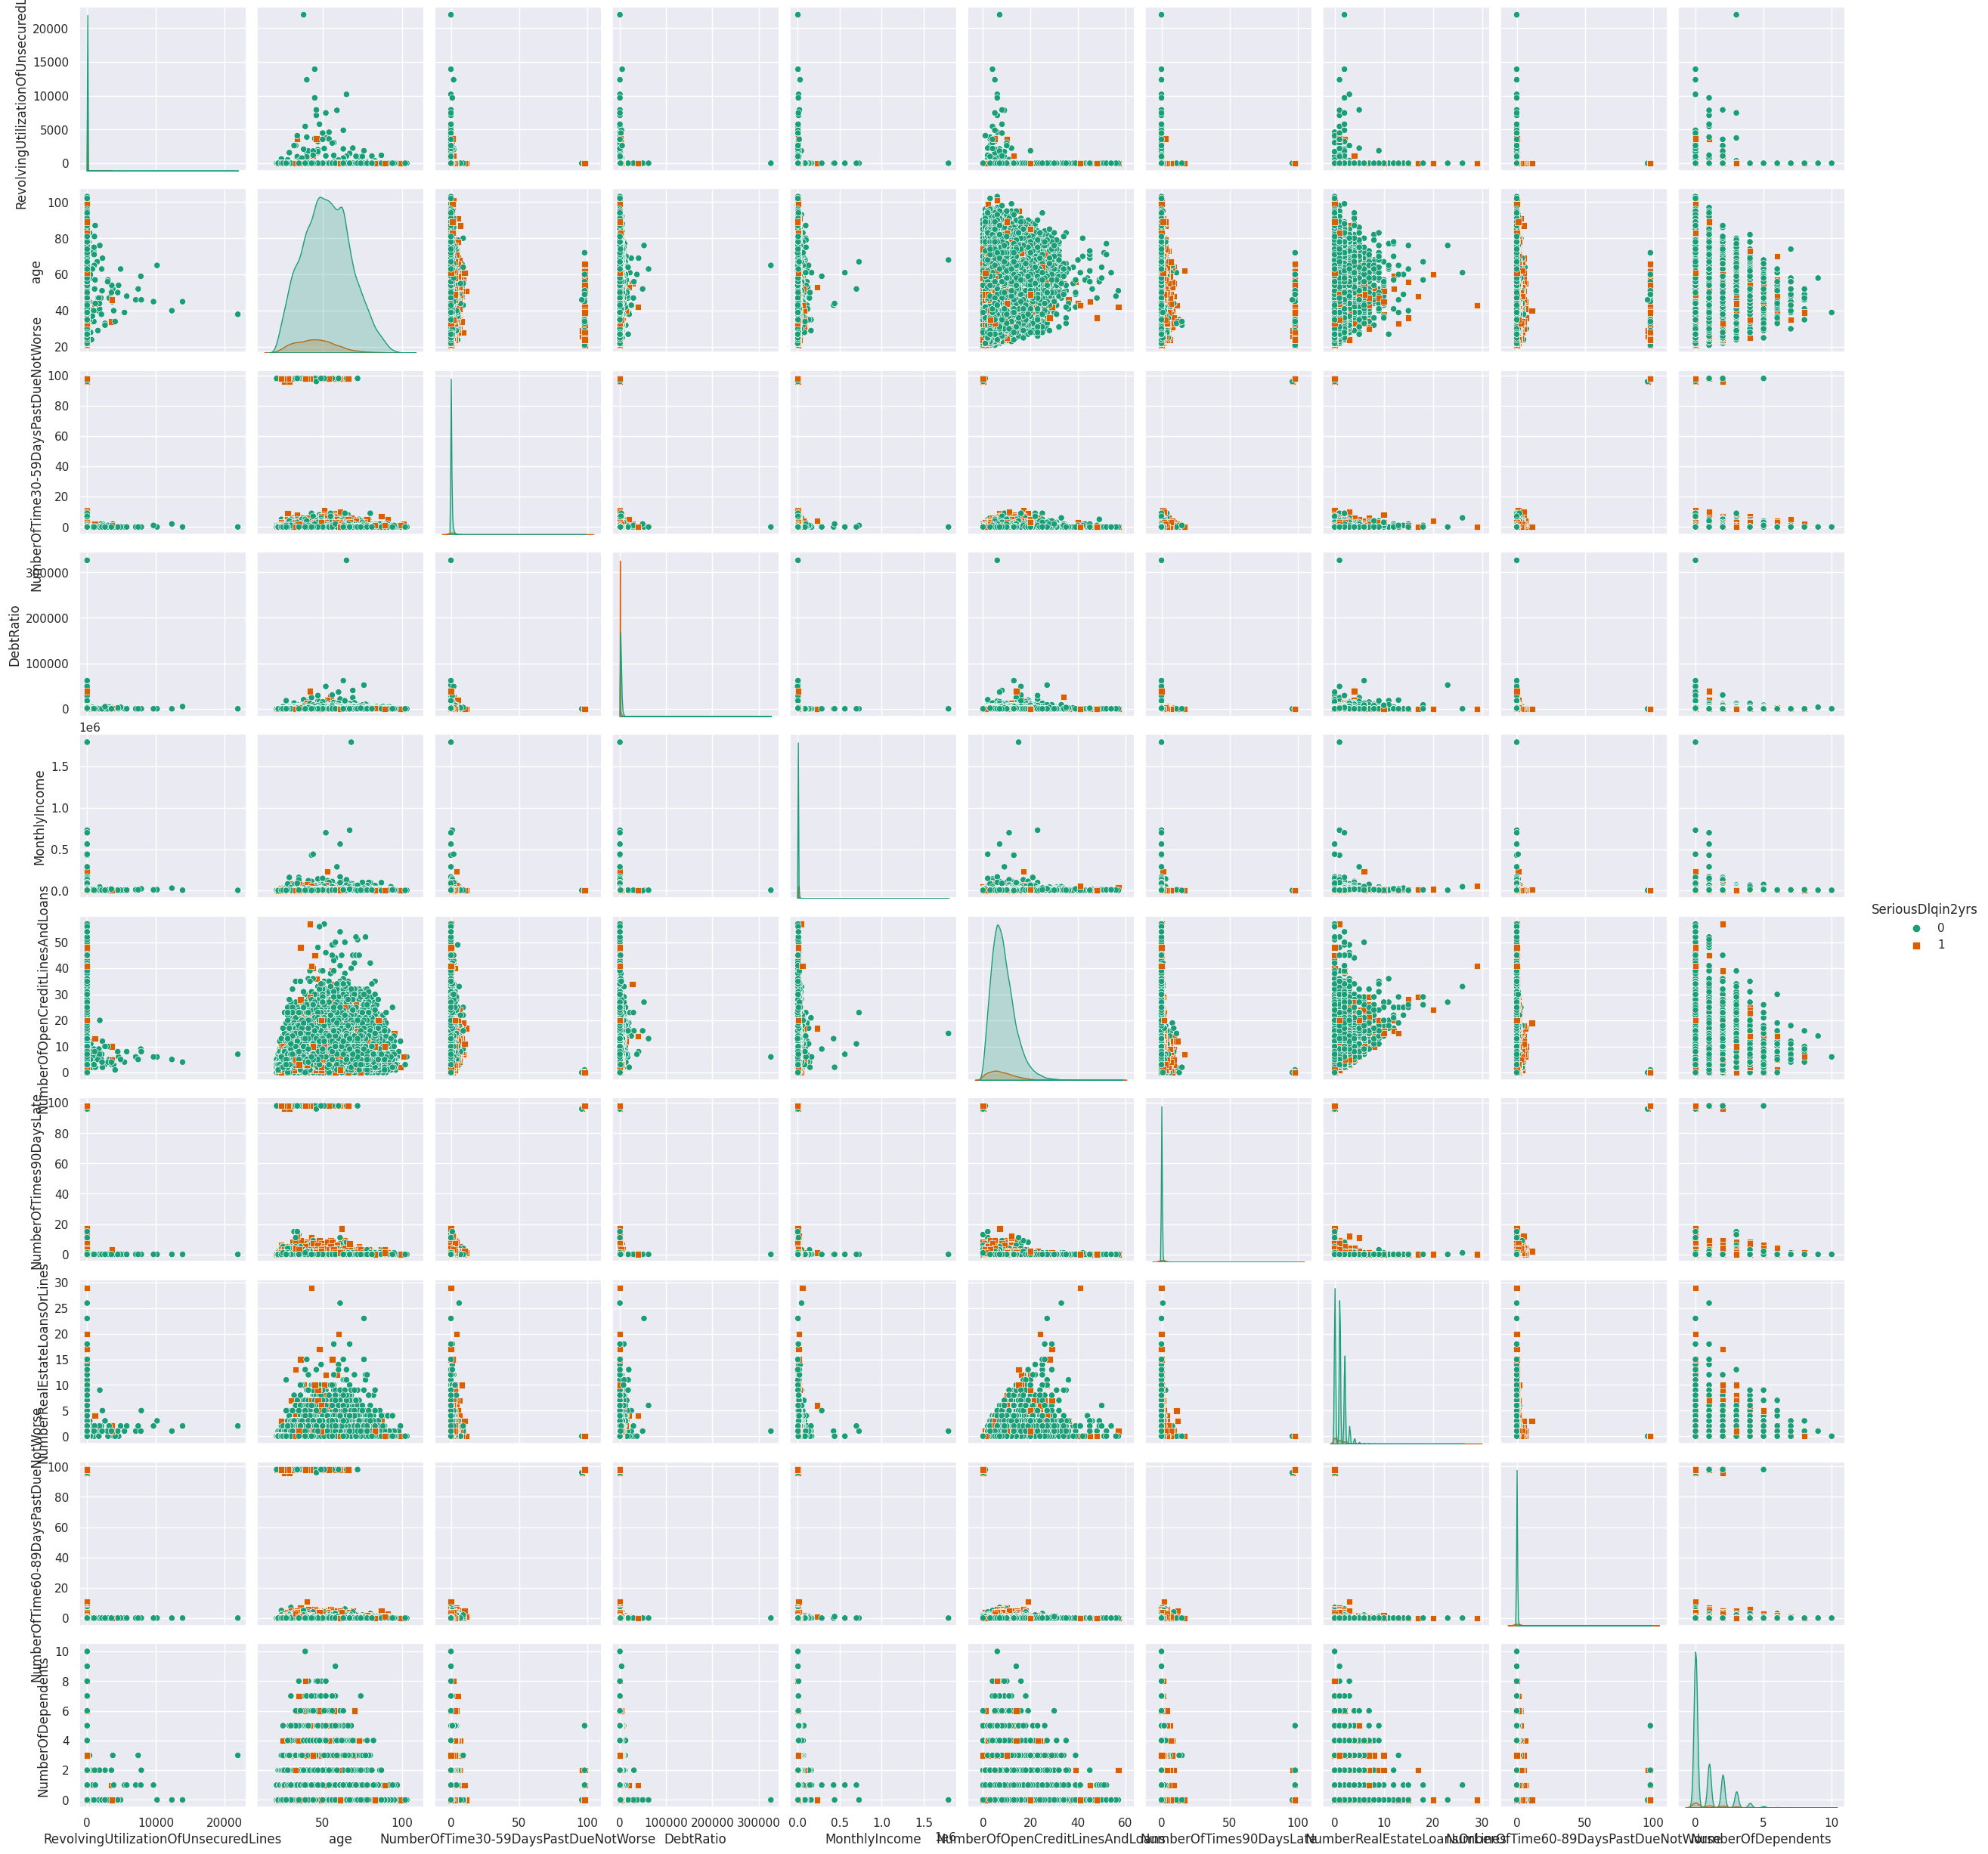

In [ ]:
# pairplot-
sns.pairplot(sampled_data_frac,hue='SeriousDlqin2yrs', markers=["o", "s"], palette='Dark2')
plt.show()

In [ ]:
# looking for some patterns -

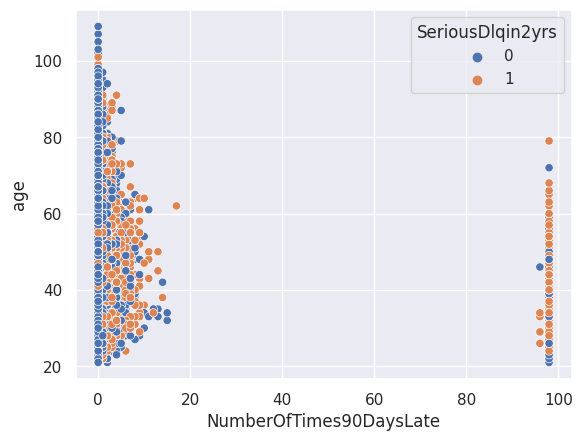

In [ ]:
sns.scatterplot(x = df['NumberOfTimes90DaysLate'],y = df['age'],hue=df['SeriousDlqin2yrs'])
plt.show()

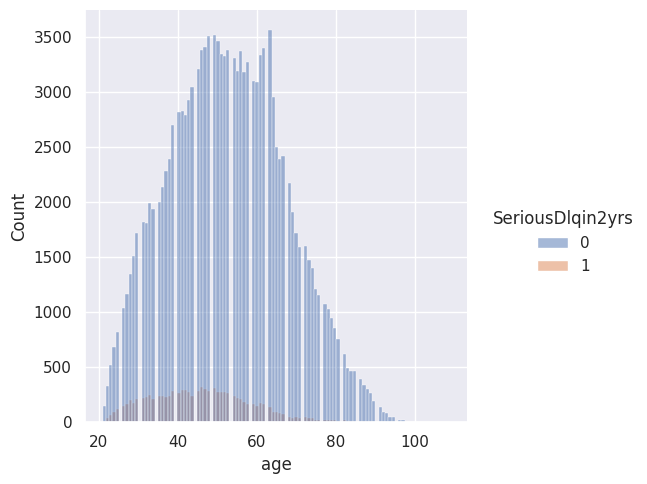

In [ ]:
# age distribution -
sns.displot(x = df['age'],hue=df['SeriousDlqin2yrs'],data = df)
# plt.xlim(0,20)
plt.show()

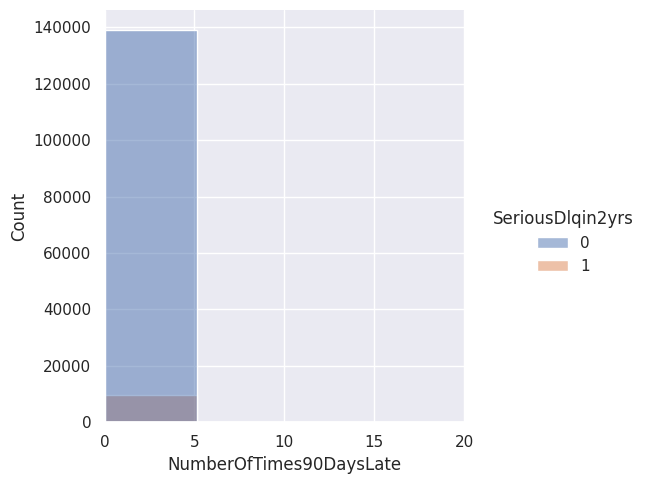

In [ ]:
sns.displot(x = df['NumberOfTimes90DaysLate'],hue=df['SeriousDlqin2yrs'],data = df)
plt.xlim(0,20)
plt.show()

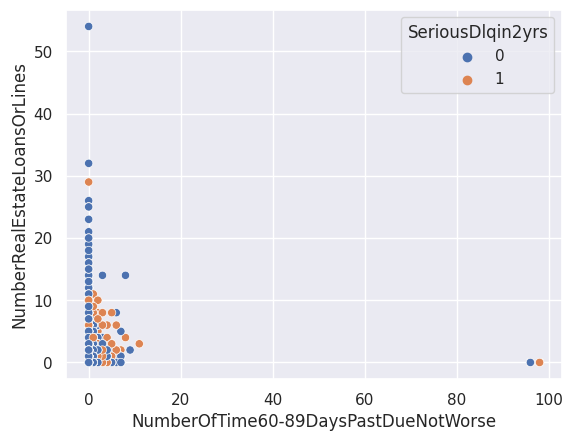

In [ ]:
sns.scatterplot(x = df['NumberOfTime60-89DaysPastDueNotWorse'],y = df['NumberRealEstateLoansOrLines'],hue=df['SeriousDlqin2yrs'])
plt.show()

In [ ]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     141831
1       5731
2       1118
3        318
98       220
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  int64  
dtype

 ### data insights -

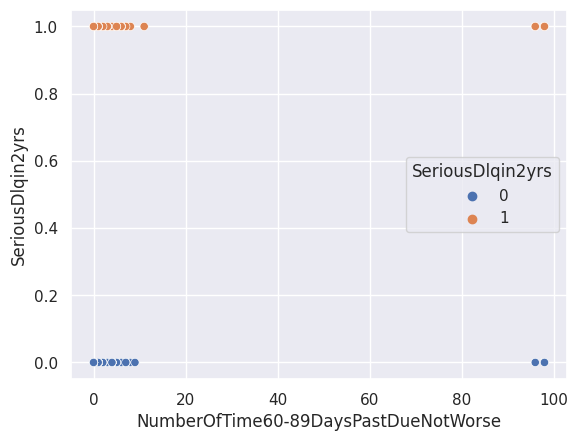

In [ ]:
sns.scatterplot(x = df['NumberOfTime60-89DaysPastDueNotWorse'],y = df['SeriousDlqin2yrs'],hue=df['SeriousDlqin2yrs'])
plt.show()

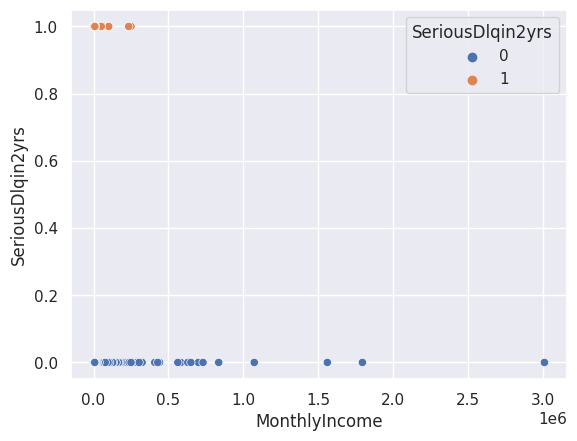

In [ ]:
sns.scatterplot(x = df['MonthlyIncome'],y = df['SeriousDlqin2yrs'],hue=df['SeriousDlqin2yrs'])
plt.show()

In [ ]:
# by looking these we are unable to infer any relation , lets deep dive into analysis -

In [ ]:
df['MonthlyIncome'].describe()

count    1.493910e+05
mean     6.484101e+03
std      1.289868e+04
min      1.000000e+00
25%      4.000000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

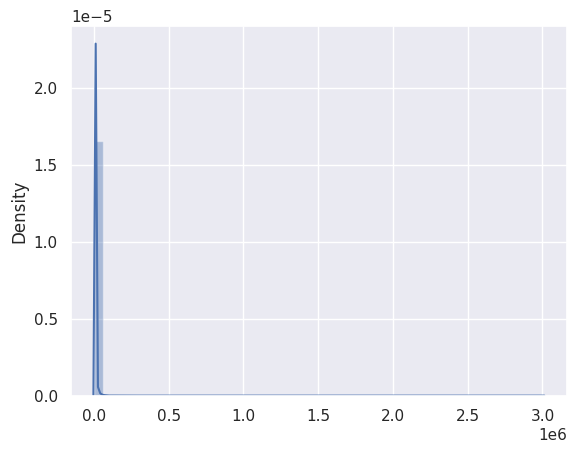

In [ ]:
sns.distplot(x = df['MonthlyIncome'])
# plt.ylim(0,100)
plt.show()

In [ ]:
mn0= df[(df['MonthlyIncome'] <4000) & (df['SeriousDlqin2yrs'] == 0)]
mn0.shape

(33181, 11)

In [ ]:
mn1= df[(df['MonthlyIncome'] <4000) & (df['SeriousDlqin2yrs'] == 1)]
mn1.shape

(3396, 11)

In [ ]:
df['SeriousDlqin2yrs'].value_counts()

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
# data suggest that SeriousDlqin2yrs classified to be 1 is 34% when monthly income is <= 4000(less then or equal to 25% of avg monthly income) and 23% for not SeriousDlqin2yrs( 0 classification) .

(0.0, 12000.0)

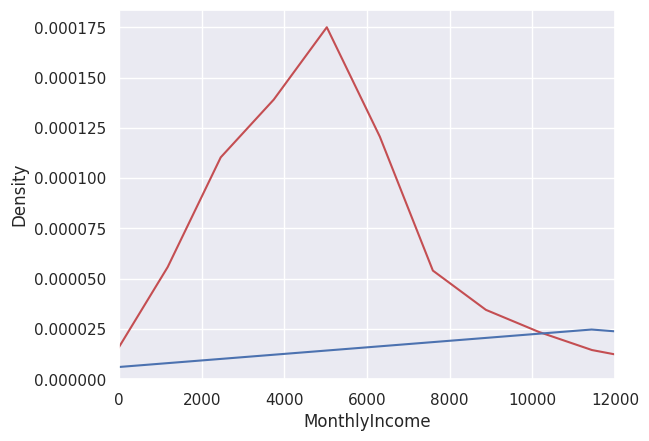

In [ ]:
# graph for better understanding the point -
sns.distplot(df[df['SeriousDlqin2yrs']==1]['MonthlyIncome'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['MonthlyIncome'],hist=False)
plt.xlim(0,12000)

(0.0, 100.0)

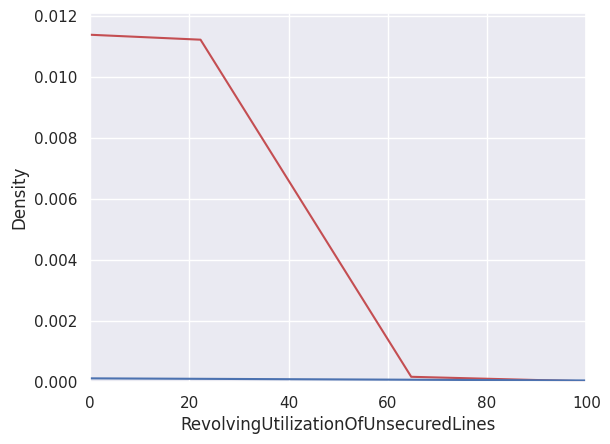

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['RevolvingUtilizationOfUnsecuredLines'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['RevolvingUtilizationOfUnsecuredLines'],hist=False)
plt.xlim(0,100)

In [ ]:
ru0= df[((df['RevolvingUtilizationOfUnsecuredLines']>0.5) & (df['RevolvingUtilizationOfUnsecuredLines'] <60)) & (df['SeriousDlqin2yrs'] == 0)]
ru0.shape

(33749, 11)

In [ ]:
ru1= df[((df['RevolvingUtilizationOfUnsecuredLines']>0.5) & (df['RevolvingUtilizationOfUnsecuredLines'] <60)) & (df['SeriousDlqin2yrs'] == 1)]
ru1.shape

(7010, 11)

In [ ]:
# When 'RevolvingUtilizationOfUnsecuredLines' value for a individual data is above 75% of avg value with respect to others, we got 7010 individuals which were classified as 1 under
# SeriousDlqin2yrs which is  70%. and 23% as 0. from this we can say that if RevolvingUtilizationOfUnsecuredLines for a data is getter than 75% from the avg there is 70% chance of SeriousDlqin2yrs.

<Axes: xlabel='age', ylabel='Density'>

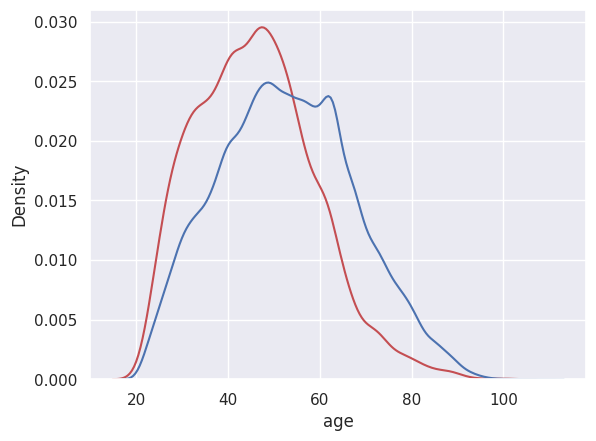

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['age'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['age'],hist=False)
# plt.xlim(0,100)

In [ ]:
# while checking age distribution for both the classes , we can't infer about SeriousDlqin2yrs classes .

(-1.0, 10.0)

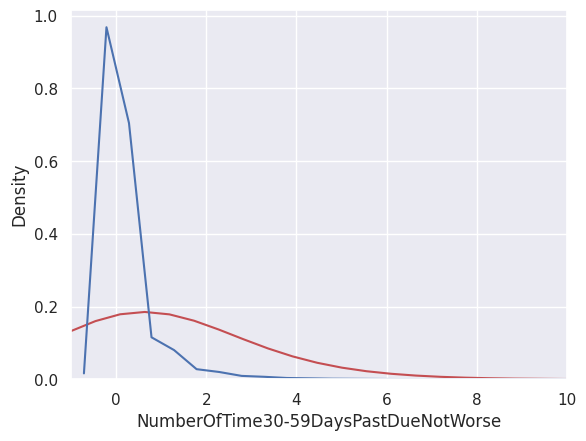

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['NumberOfTime30-59DaysPastDueNotWorse'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['NumberOfTime30-59DaysPastDueNotWorse'],hist=False)
plt.xlim(-1,10)

In [ ]:
tf0= df[(df['NumberOfTime30-59DaysPastDueNotWorse'] >1) & (df['SeriousDlqin2yrs'] == 0)]
tf0.shape

(5340, 11)

In [ ]:
tf1= df[(df['NumberOfTime30-59DaysPastDueNotWorse'] >1) & (df['SeriousDlqin2yrs'] == 1)]
tf1.shape

(2565, 11)

In [ ]:
# one key insights here is if 'NumberOfTime30-59DaysPastDueNotWorse' is exceeding 1 day
# chances of SeriousDlqin2yrs is around 26% but the highlight is the counterpart, chances
# of not of SeriousDlqin2yrs , as only 3.84% of 0  classified data seen exceeding 1 day .
# this may help us identify optimum behaivour should be .
# imp - suggestion to customers is to not exceed NumberOfTime30-59DaysPastDueNotWorse more than one day.out of all 0 classified data around 96% data didn't exceeded more than 1 day.

(0.0, 800.0)

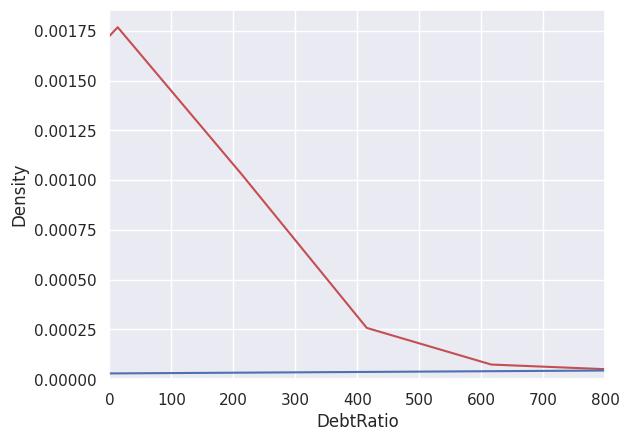

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['DebtRatio'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['DebtRatio'],hist=False)
plt.xlim(0,800)

In [ ]:
dr0= df[(df['DebtRatio'] <100) & (df['SeriousDlqin2yrs'] == 0)]
dr0.shape

(116392, 11)

In [ ]:
dr1= df[(df['DebtRatio'] <100) & (df['SeriousDlqin2yrs'] == 1)]
dr1.shape

(8599, 11)

In [ ]:
# unable to identify any pattern here.

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

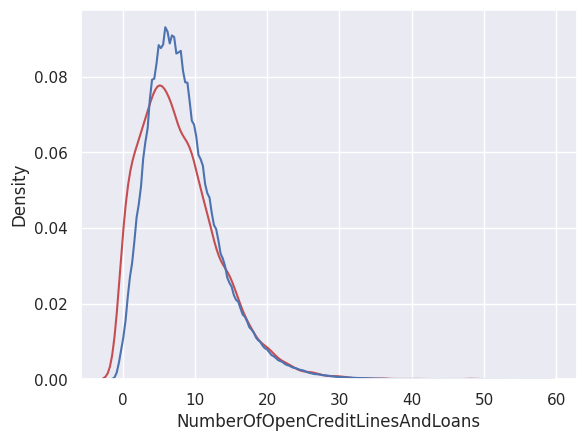

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['NumberOfOpenCreditLinesAndLoans'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['NumberOfOpenCreditLinesAndLoans'],hist=False)

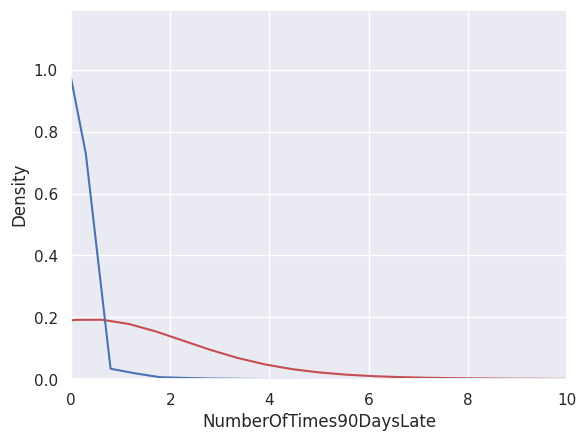

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['NumberOfTimes90DaysLate'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['NumberOfTimes90DaysLate'],hist=False)
plt.xlim(0,10)
plt.show()

In [ ]:
d0= df[(df['NumberOfTimes90DaysLate'] >0) & (df['SeriousDlqin2yrs'] == 0)]
d0.shape

(4823, 11)

In [ ]:
d1= df[(df['NumberOfTimes90DaysLate'] >0) & (df['SeriousDlqin2yrs'] == 1)]
d1.shape

(3460, 11)

In [ ]:
# here, data suggests 96% of 0 classified data not exceeded NumberOfTimes90DaysLate warning,
# imp - suggestion to customers is to keep NumberOfTimes90DaysLate = 0
# NumberOfTimes90DaysLate > 0 chances of SeriousDlqin2yrs increase upto 34.60%.

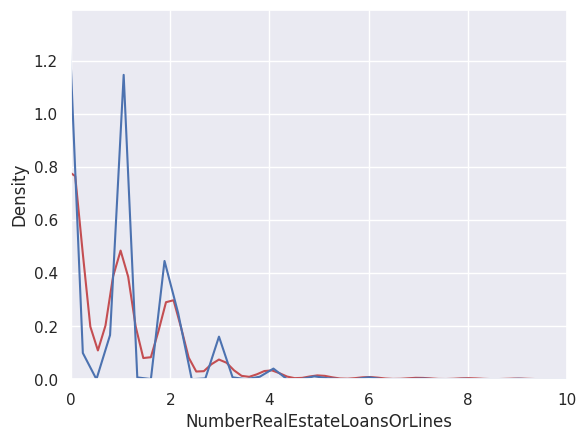

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['NumberRealEstateLoansOrLines'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['NumberRealEstateLoansOrLines'],hist=False)
plt.xlim(0,10)
plt.show()

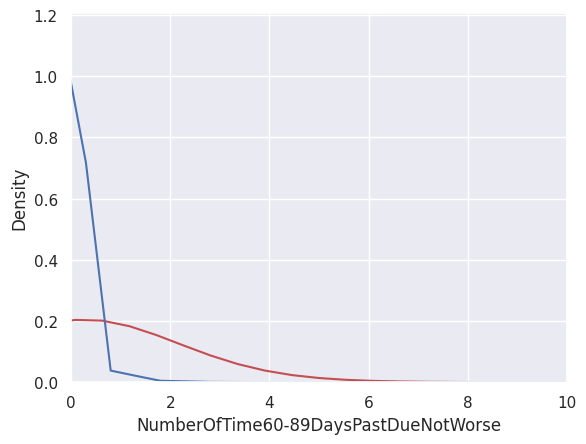

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['NumberOfTime60-89DaysPastDueNotWorse'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['NumberOfTime60-89DaysPastDueNotWorse'],hist=False)
plt.xlim(0,10)
plt.show()

In [ ]:
st0= df[(df['NumberOfTime60-89DaysPastDueNotWorse'] >0) & (df['SeriousDlqin2yrs'] == 0)]
st0.shape

(4801, 11)

In [ ]:
st1= df[(df['NumberOfTime60-89DaysPastDueNotWorse'] >0) & (df['SeriousDlqin2yrs'] == 1)]
st1.shape

(2759, 11)

In [ ]:
# if NumberOfTime60-89DaysPastDueNotWorse  > 0 than 27% of SeriousDlqin2yrs.similarly 96% of good customers or 0 classified data has NumberOfTime60-89DaysPastDueNotWorse = 0 , not exceeding 0.
# imp - suggestion to customers keep NumberOfTime60-89DaysPastDueNotWorse = 0

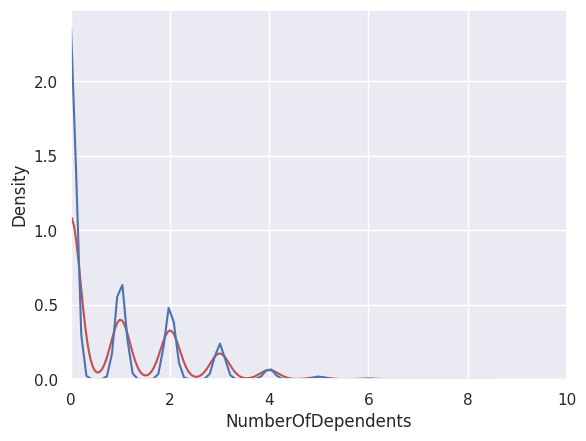

In [ ]:
sns.distplot(df[df['SeriousDlqin2yrs']==1]['NumberOfDependents'],hist=False,color='r')
sns.distplot(df[df['SeriousDlqin2yrs']==0]['NumberOfDependents'],hist=False)
plt.xlim(0,10)
plt.show()

In [ ]:
# can't infer columns- age,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines and NumberOfDependents.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  int64  
dtype

In [ ]:
# outlier detection and treatment with IQR-
# note we are retaining columns - NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
# and NumberOfTime60-89DaysPastDueNotWorse as doing outlier treatment will result in complete 0
# and data loss

In [28]:
cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
        'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents']

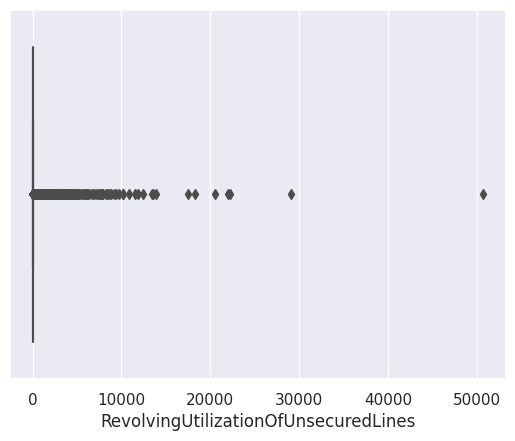

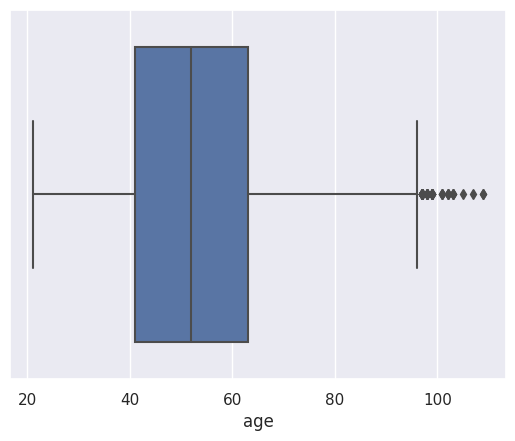

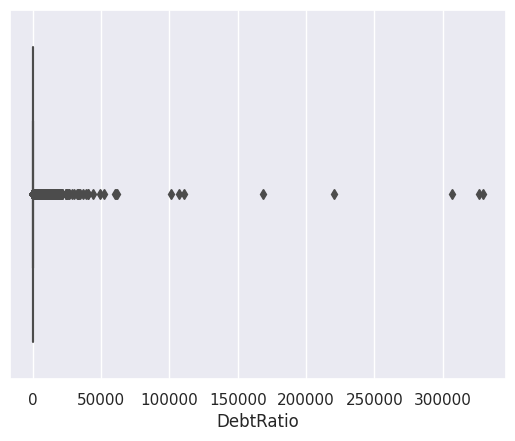

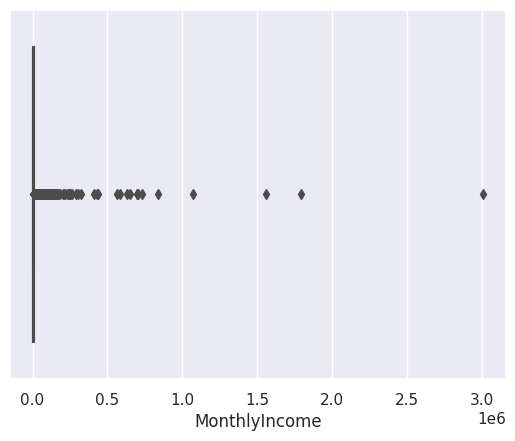

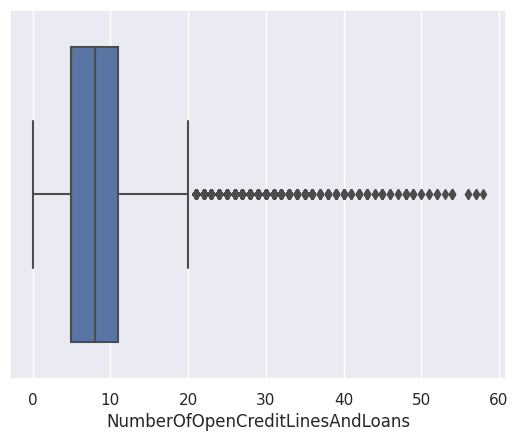

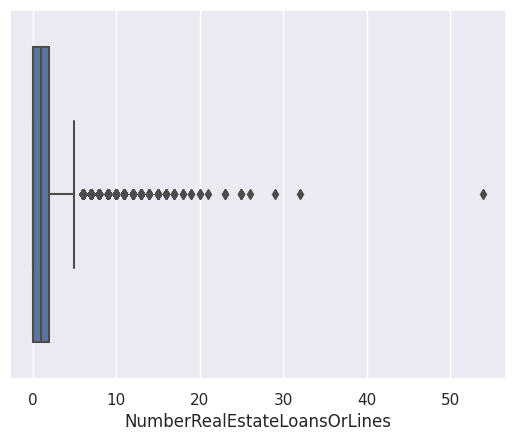

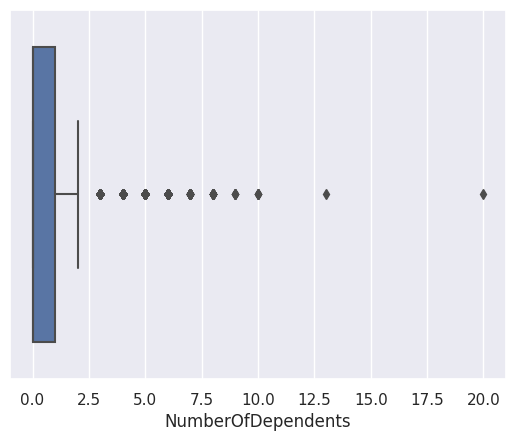

In [ ]:
for i in cols:
  sns.boxplot(x = df[i])
  plt.show()

In [29]:
# capping outliers-
for i in  cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df.loc[(df[i]>upper_limit), i] = upper_limit
    df.loc[(df[i]<lower_limit), i] = lower_limit

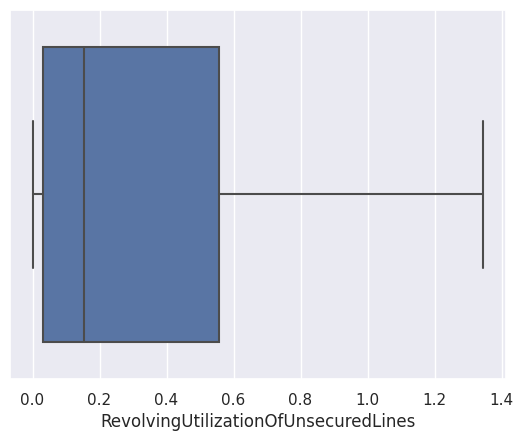

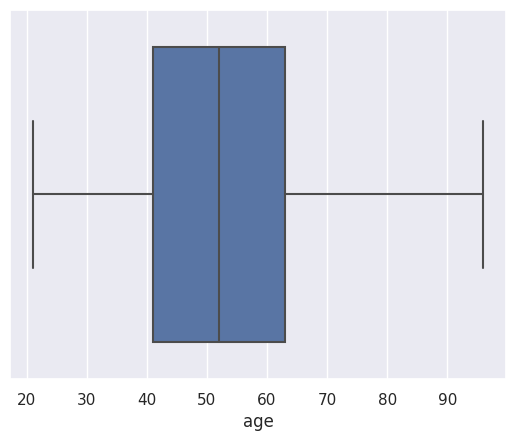

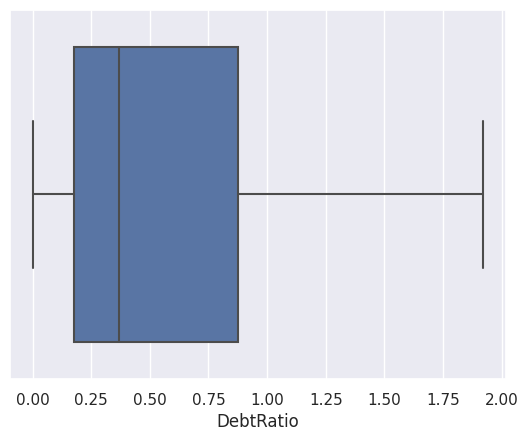

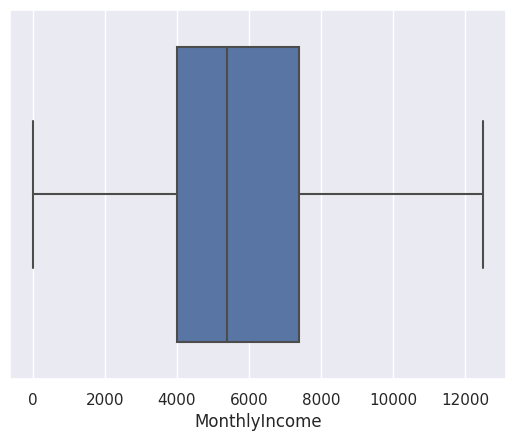

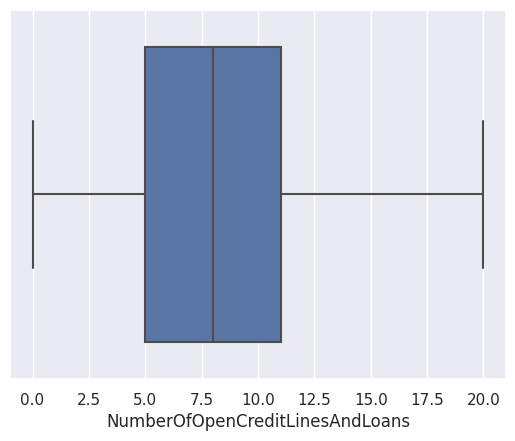

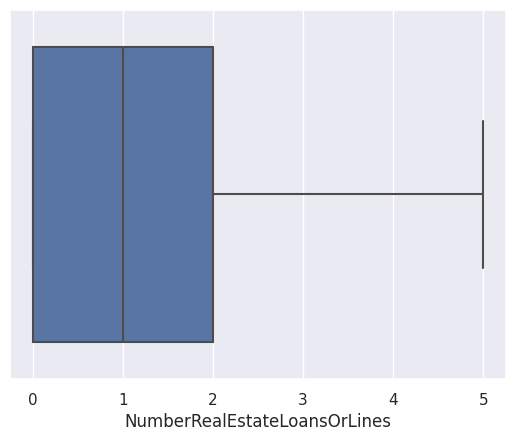

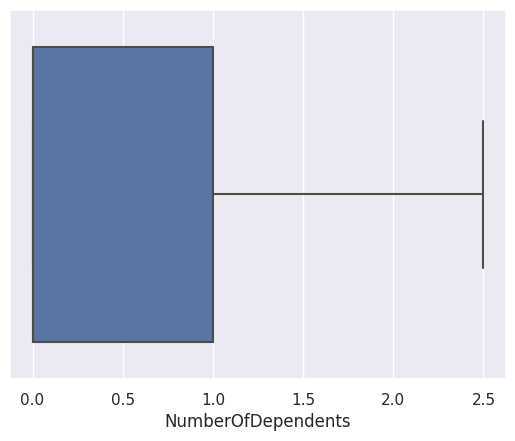

In [ ]:
for i in cols:
  sns.boxplot(x = df[i])
  plt.show()

In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,0.321531,52.305561,0.393886,0.668786,5931.676975,8.355456,0.238120,1.006567,0.212503,0.660656
std,0.250021,0.355602,14.722078,3.852953,0.693451,2965.807025,4.725422,3.826165,1.020365,3.810523,0.905702
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,4000.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7400.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.346038,96.000000,98.000000,1.922036,12500.000000,20.000000,98.000000,5.000000,98.000000,2.500000


In [30]:
# checking skewness -
from scipy.stats import skew
skewed = []
for i in df.columns[1:]:
    print(f'Feature: {i} ,Skewness: {skew(df[i])}')
    if skew(df[i]) >=0.75 or skew(df[i]) <=-0.75:
        a = [i,skew(df[i])]
        skewed.append(a)

Feature: RevolvingUtilizationOfUnsecuredLines ,Skewness: 0.9521222867122446
Feature: age ,Skewness: 0.19071926017670393
Feature: NumberOfTime30-59DaysPastDueNotWorse ,Skewness: 24.474362332694536
Feature: DebtRatio ,Skewness: 1.0441950938314255
Feature: MonthlyIncome ,Skewness: 0.681964469925445
Feature: NumberOfOpenCreditLinesAndLoans ,Skewness: 0.634028045802004
Feature: NumberOfTimes90DaysLate ,Skewness: 25.10711948384236
Feature: NumberRealEstateLoansOrLines ,Skewness: 1.1135034106567865
Feature: NumberOfTime60-89DaysPastDueNotWorse ,Skewness: 25.424132567744678
Feature: NumberOfDependents ,Skewness: 0.9451623860549233


In [31]:
lst = []
for i in skewed:
    a = str(i[0])
    lst.append(a)
lst

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [32]:
#yeojohnson transformation technique is very similar to Box-cox transformation
#but does not require the values to be strictly positive.
from scipy.stats import yeojohnson
for i in lst:
    transformed_data, lambda_value = yeojohnson(df[i])
    df[i] = transformed_data

<Axes: xlabel='NumberOfTimes90DaysLate', ylabel='Density'>

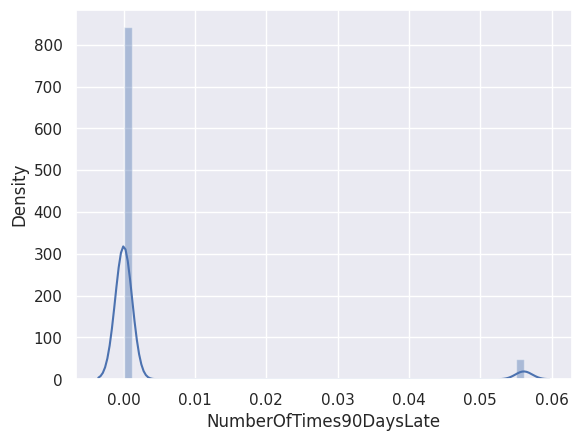

In [ ]:
sns.distplot(df['NumberOfTimes90DaysLate'])

In [ ]:
df['NumberOfTime30-59DaysPastDueNotWorse'].unique()

array([ 0.15171375, -0.        ,  0.15024339,  0.15180664,  0.15181929,
        0.15182193,  0.1518229 ,  0.15182305,  0.15182266,  0.15182307,
        0.15182307,  0.15182299,  0.15182303,  0.15182307,  0.15182307,
        0.15182306])

In [ ]:
df['NumberOfTimes90DaysLate'].unique()

array([-0.        ,  0.05611039,  0.05611063,  0.05611063,  0.05611063,
        0.05611063,  0.05611063,  0.05611063,  0.05611063])

In [ ]:
df['NumberOfTime60-89DaysPastDueNotWorse'].unique()

array([-0.        ,  0.04661783,  0.04661784,  0.04661784,  0.04661784,
        0.04661784])

### correlation matrix -

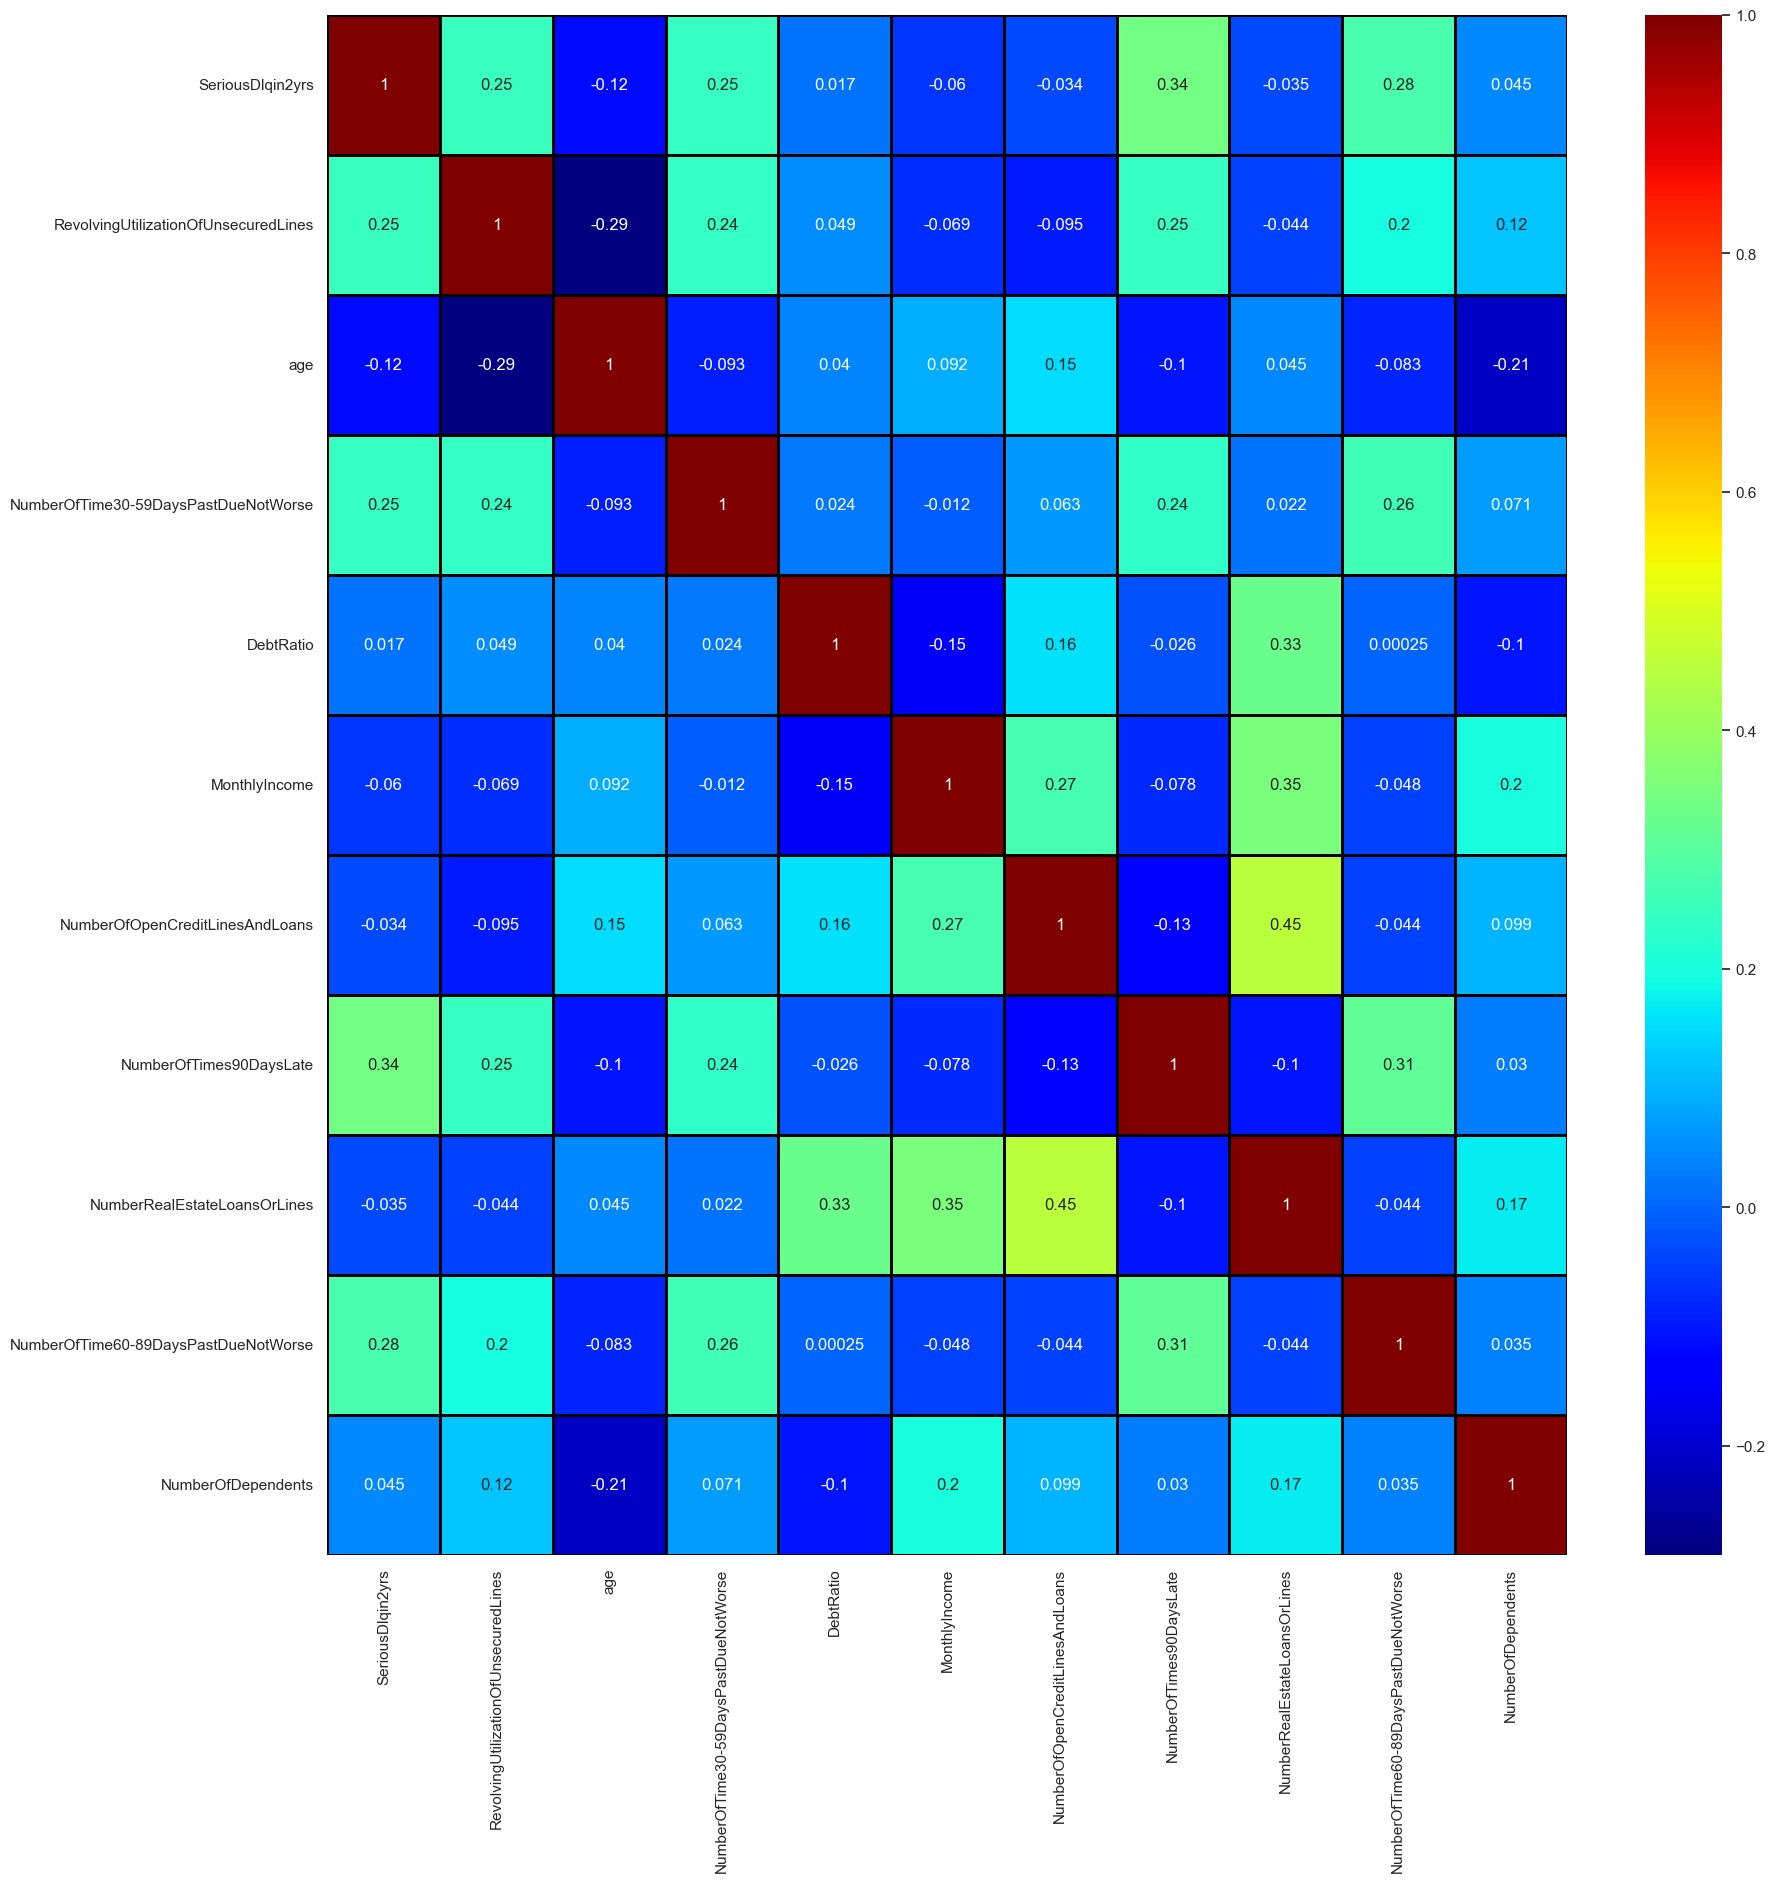

In [33]:
# correlation matrix -
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='jet',linecolor='black',linewidth=1)
plt.show()

In [34]:
corr_matrix = df.corr()
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.75:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
for pair in corr_pairs:
    print(f"{pair[0]} and {pair[1]} have a correlation of {pair[2]}")

In [35]:
# no correlation -
corr_pairs

[]

In [ ]:
# correlation with target variable - all low correlation with target
tar_corr = df.corrwith(df['SeriousDlqin2yrs'])
tar_corr

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.252405
age                                    -0.115759
NumberOfTime30-59DaysPastDueNotWorse    0.246663
DebtRatio                               0.016697
MonthlyIncome                          -0.060274
NumberOfOpenCreditLinesAndLoans        -0.034050
NumberOfTimes90DaysLate                 0.339868
NumberRealEstateLoansOrLines           -0.034920
NumberOfTime60-89DaysPastDueNotWorse    0.275133
NumberOfDependents                      0.045128
dtype: float64

In [36]:
# target class imbalance-
df['SeriousDlqin2yrs'].value_counts()/(len(df))*100

0    93.300132
1     6.699868
Name: SeriousDlqin2yrs, dtype: float64

In [ ]:
# 0 class is 93% and 1 class is only 6%.
# Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the
# minority class. Simply adding duplicate records of minority class often don’t add any new
# information to the model. In SMOTE new instances are synthesized from the existing data.
# If we explain it in simple words, SMOTE looks into minority class instances and use
# k nearest neighbor to select a random nearest neighbor, and a synthetic instance is
# created randomly in feature space.

In [ ]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.303498,-0.496233,2.306798,0.678284,1.075031,0.982888,-0.242280,2.270607,-0.230874,1.387801
1,0,1.495415,-0.835860,-0.436815,-0.969899,-1.123366,-0.921711,-0.242280,-1.184241,-0.230874,0.959994
2,0,1.160665,-0.971711,2.280208,-1.134058,-0.974334,-1.344955,4.127445,-1.184241,-0.230874,-0.800812
3,0,0.123170,-1.515115,-0.436815,-1.375629,-0.887342,-0.710089,-0.242280,-1.184241,-0.230874,-0.800812
4,0,1.451387,-0.224532,2.280208,-1.434366,2.214691,-0.286844,-0.242280,0.282348,-0.230874,-0.800812


In [37]:
# scaling data -
from sklearn.preprocessing import StandardScaler
for col in df.columns[1:]:
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[[col]])

In [ ]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.303498,-0.496233,2.306798,0.678284,1.075031,0.982888,-0.242280,2.270607,-0.230874,1.387801
1,0,1.495415,-0.835860,-0.436815,-0.969899,-1.123366,-0.921711,-0.242280,-1.184241,-0.230874,0.959994
2,0,1.160665,-0.971711,2.280208,-1.134058,-0.974334,-1.344955,4.127445,-1.184241,-0.230874,-0.800812
3,0,0.123170,-1.515115,-0.436815,-1.375629,-0.887342,-0.710089,-0.242280,-1.184241,-0.230874,-0.800812
4,0,1.451387,-0.224532,2.280208,-1.434366,2.214691,-0.286844,-0.242280,0.282348,-0.230874,-0.800812


In [38]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
df.loc[(df['SeriousDlqin2yrs'] == 1)]

In [44]:
df.shape

(149391, 11)

In [ ]:
# lets try anamoly detection - 

In [45]:
# contamination fraction  - outlier/total - 
10009/149391

0.06699868131279663

In [143]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.3,random_state=101)

In [144]:
isf = IsolationForest(contamination=0.06, random_state=42)

In [145]:
# non_fraud_x = x_train[y_train == 0]
isf.fit(x_train)

IsolationForest(contamination=0.06, random_state=42)

In [146]:
# Predict anomalies on the test set
predictions = isf.predict(x_test)

In [147]:
# predictions[predictions == 0].shape
predictions[predictions == 1].shape
# predictions[predictions == -1].shape

(42133,)

In [154]:
# Use cross-validation for anomaly detection
predictions = cross_val_predict(isf, x_test, cv=5)
predictions[predictions == 1] = 0  # Normal
predictions[predictions == -1] = 1

In [133]:
# # Convert predictions: 1 for normal, -1 for anomaly
# predictions[predictions == 1] = 0  # Normal
# predictions[predictions == -1] = 1

In [155]:
# Evaluate the model's performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     41776
           1       0.42      0.37      0.39      3042

    accuracy                           0.92     44818
   macro avg       0.69      0.66      0.67     44818
weighted avg       0.92      0.92      0.92     44818



In [ ]:
# lets try classical ml algorithms - 

In [ ]:
# important thing to note, when countering data imbalance we should also consider other metrics like precision,recall,f1score not just accuracy -

In [ ]:
# handling class imbalance via SMOTE -
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_x, oversampled_y = sm.fit_resample(x,y)

In [ ]:
#train_test_split -
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(oversampled_x, oversampled_y,test_size = 0.3,random_state=101)

### model building -

In [ ]:
#1) XGboost Classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import  roc_auc_score,roc_curve,precision_score, recall_score, f1_score

In [ ]:
modelx = XGBClassifier()

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(5)
result = cross_val_score(modelx,x_train,y_train,cv=kfold)
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.95728598 0.95597919 0.96036078 0.95528737 0.95600369]
Accuracy:  0.957


In [ ]:
modelx.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_train =modelx.predict(x_train)
pred_y = modelx.predict(x_test)

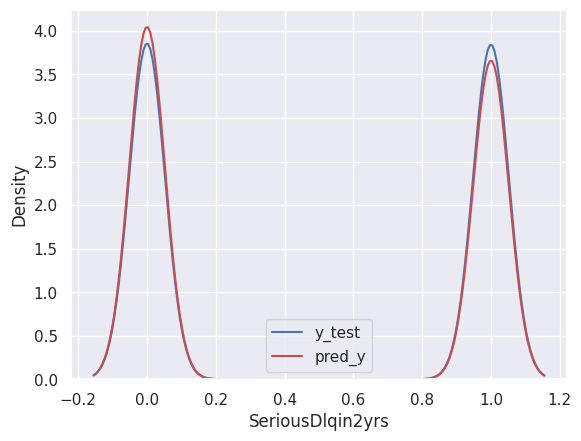

In [ ]:
# actual vs predicted graph -
sns.distplot(y_test,label='y_test',hist=False)
sns.distplot(pred_y,label='pred_y',hist=False,color='r')
plt.legend()
plt.show()

In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y))

Train Accuracy 0.9631586499533654
*****************************************************
Test Accuracy 0.9567380126748775


In [ ]:
#classification report-
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     41886
           1       0.98      0.93      0.96     41744

    accuracy                           0.96     83630
   macro avg       0.96      0.96      0.96     83630
weighted avg       0.96      0.96      0.96     83630



Text(0.5, 19.049999999999997, 'Prediction')

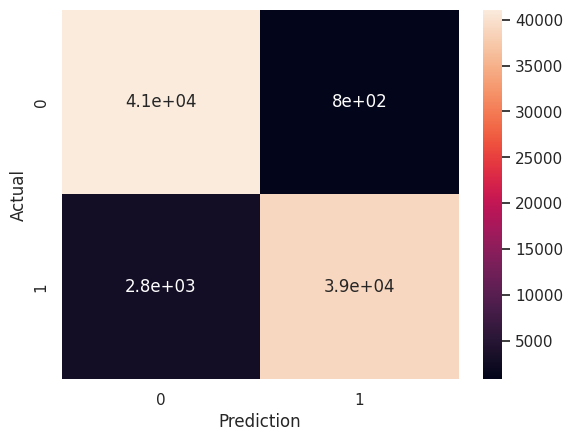

In [ ]:
# confusion_matrix -
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')
# print(classification_report(y_test, pred_y))

In [ ]:
precision = precision_score(y_test, pred_y)
recall = recall_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.98
Recall: 0.93
F1-score: 0.96


In [ ]:
# AUC-ROC score -
xgb_roc_auc = roc_auc_score(y_test, pred_y)
xgb_roc_auc

0.9566967129720604

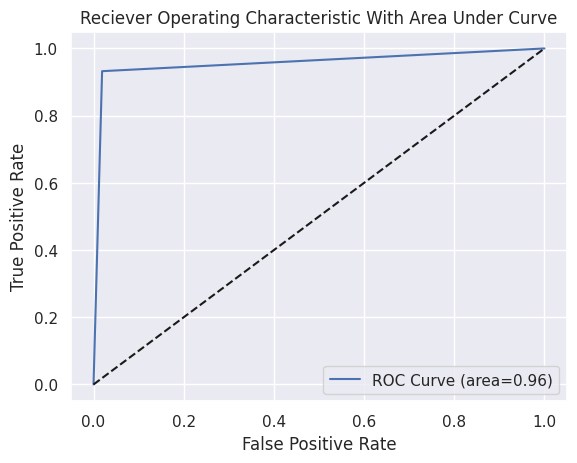

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (area=%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic With Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
#2) RandomForest Classifier

In [ ]:
modely = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(5)
result = cross_val_score(modely,x_train,y_train,cv=kfold)
print(result)
print(f'Accuracy:  {np.mean(result):.3f}')

[0.94706229 0.94378251 0.94654982 0.94544802 0.94939271]
Accuracy:  0.946


In [ ]:
modely.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train_rf =modely.predict(x_train)
pred_y_rf = modely.predict(x_test)

In [ ]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print("*****************************************************")
print("Test Accuracy", accuracy_score(y_test, pred_y_rf))

Train Accuracy 0.9995387784804288
*****************************************************
Test Accuracy 0.9530790386225039


In [ ]:
#classification report-
print(classification_report(y_test, pred_y_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     41886
           1       0.95      0.95      0.95     41744

    accuracy                           0.95     83630
   macro avg       0.95      0.95      0.95     83630
weighted avg       0.95      0.95      0.95     83630



In [ ]:
precision = precision_score(y_test, pred_y_rf)
recall = recall_score(y_test, pred_y_rf)
f1 = f1_score(y_test, pred_y_rf)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.95
Recall: 0.95
F1-score: 0.95


###Q - Would you consider maximizing profit, revenue or the number of loans taken? Do you think these are good ideas or propose other considerations?

####Ans - In a credit risk ML model, the objective should be aligned with the overall business goals,objectives and risk tolerance of the organization using the model. The choice of objective depends on the specific context and priorities of the institution or organization.out of all mentioned here like -
#### 1)Maximizing Profit: If the primary goal of the institution is to maximize profit, the ML model should be designed to identify borrowers who are likely to repay their loans with interest. This means focusing on minimizing default rates and targeting customers with lower credit risk. However, this approach could result in excluding potentially good borrowers with slightly higher risks, which might limit the total number of loans given.
#### 2) Maximizing Revenue: If the focus is on maximizing revenue, the model might prioritize approving more loans overall, even if it means taking on higher credit risks. This approach could lead to more loans taken, but it also increases the likelihood of defaults or SeriousDlqin2yrs.
#### 3) Maximizing the Number of Loans Taken: the model might be designed to be more lenient in approving loans and accepting higher-risk applicants. This approach can help reach a broader customer base and increase market share, but it might also lead to higher SeriousDlqin2yrs.

#### I believe risk-adjusted profit: approach to focus on maximizing risk-adjusted profit. which involves considering both the expected profit from loans and the potential losses. It takes into account the risk associated with each loan, and the objective is to improve profit via loans and lendings but also keep check on risk, by developing various guidelines and analyse data for criterias for optimum results like identifying what people did right that were not classified under SeriousDlqin2yrs.

#### like some of the insights given in insight section -
#### 1) data suggest that SeriousDlqin2yrs classified to be 1 is 34% when monthly income is <= 4000(less then or equal to 25% of avg monthly income) and 23% for not SeriousDlqin2yrs( 0 classification) .
#### 2) When 'RevolvingUtilizationOfUnsecuredLines' value for a individual data is above 75% of avg value with respect to others, we got 7010 individuals which were classified as 1 under SeriousDlqin2yrs which is  70%. and 23% as 0. from this we can say that if RevolvingUtilizationOfUnsecuredLines for a data is getter than 75% from the avg there is 70% chance of SeriousDlqin2yrs.
#### 3) suggestion to customers is to not exceed NumberOfTime30-59DaysPastDueNotWorse more than one day.out of all 0 classified data around 96% data didn't exceeded more than 1 day.
#### 4) data suggests 96% of 0 classified data not exceeded NumberOfTimes90DaysLate warning, suggestion to customers is to keep NumberOfTimes90DaysLate = 0
#### 5) NumberOfTime60-89DaysPastDueNotWorse  > 0 than 27% of SeriousDlqin2yrs.similarly 96% of good customers or 0 classified data has NumberOfTime60-89DaysPastDueNotWorse = 0 , not exceeding 0. suggestion to customers keep NumberOfTime60-89DaysPastDueNotWorse = 0


### I believe that data tells us more than just numbers, it helps us understand our users and their desires.

### Thank you


